              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


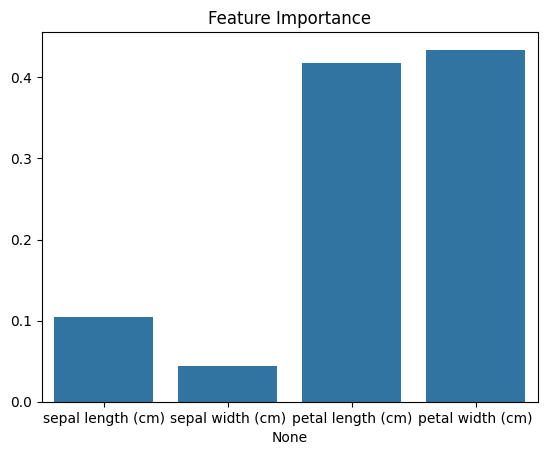

In [4]:
# SpeciesClassification.ipynb

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset (You can replace it with your own species dataset)
from sklearn.datasets import load_iris
data = load_iris()

# Convert to a pandas DataFrame for easier manipulation
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target

# Feature engineering
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Save the model
joblib.dump(model, '../backend/models/species_model.pkl')

# Visualize the feature importances
feature_importances = model.feature_importances_
sns.barplot(x=X.columns, y=feature_importances)
plt.title('Feature Importance')
plt.show()
